In [1]:
import pandas as pd

In [2]:
!pip install pandas

In [3]:
!pip install yfinance

  Using cached yfinance-0.2.35-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-5.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached frozendict-2.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached peewee-3.17.0-cp310-cp310-linux_x86_64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.35-py2.py3-none-any.whl (72 kB)
Using cached frozendict-2.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (116 kB)
Using cached lxml-5.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.0 MB)


In [4]:
!pip install matplotlib

In [5]:
!pip install scikit-learn

In [6]:
import yfinance as yf

In [7]:
sp500 = yf.Ticker("^GSPC")

In [8]:
sp500 = sp500.history(period ="max")

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,0.0,0.0
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000,0.0,0.0
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0


In [10]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-27 00:00:00-05:00', '2023-12-28 00:00:00-05:00',
               '2023-12-29 00:00:00-05:00', '2024-01-02 00:00:00-05:00',
               '2024-01-03 00:00:00-05:00', '2024-01-04 00:00:00-05:00',
               '2024-01-05 00:00:00-05:00', '2024-01-08 00:00:00-05:00',
               '2024-01-09 00:00:00-05:00', '2024-01-10 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24122, freq=None)

<Axes: xlabel='Date'>

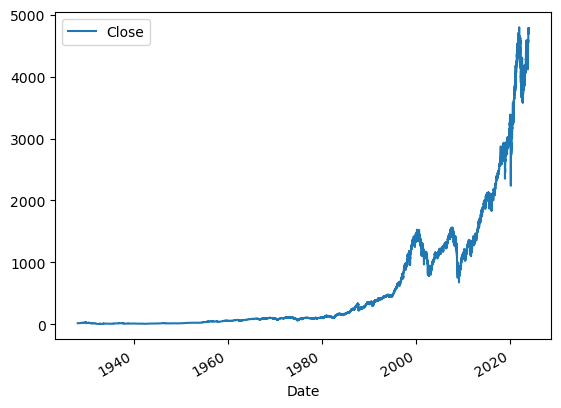

In [11]:
sp500.plot.line(y="Close",use_index=True)

In [12]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Now we are setting up our target for machine learning. We want to know whether the price will go up or down tomorrow.

In [13]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,4697.240234
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000,4763.540039
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,4756.500000


In [15]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,4697.240234,1
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000,4763.540039,1
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,4756.500000,0


In [31]:
sp500 = sp500.loc["1990-01-01":"2022-05-18"].copy()

In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,1
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,0
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,1


Now for our machine learning model

Why use RandomForest as your default model for machine learning?
- Randomforest works by training a bunch of individual decision trees with randomised parameters, then averages the results from the decision trees.
- Due to this process RandomForest is resistant to overfitting not always but better!
- Also run relatively quickly

In [33]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators is the number of decision trees you would want to train, the higher this is the more accurate you are (generally)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "High", "Low"]
# this next line of code is going to train the model using the predictors columns in order to predict the Target
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [34]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [35]:
preds = pd.Series(preds,index = test.index)

In [36]:
precision_score(test["Target"],preds)

0.4523809523809524

In [37]:
combined = pd.concat([test["Target"],preds], axis=1)

<Axes: xlabel='Date'>

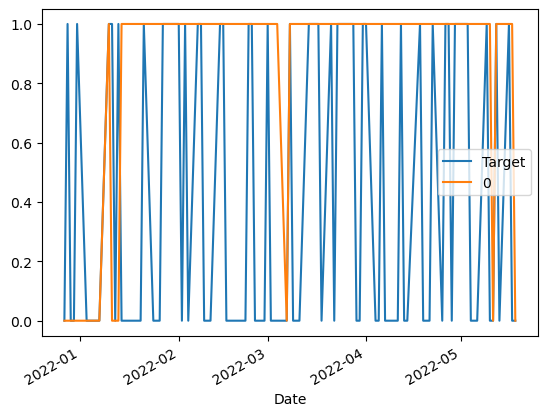

In [38]:
combined.plot()

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [40]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [41]:
predictions = backtest(sp500,model,predictors)

In [42]:
predictions["Predictions"].value_counts()

Predictions
0    3229
1    2430
Name: count, dtype: int64

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5378600823045268

In [44]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536844
0    0.463156
Name: count, dtype: float64

In [45]:
horizons = [2, 5, 60, 250, 1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean().copy()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500.loc[:, ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500.loc[:, trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]


In [46]:
sp500 = sp500.dropna()

In [47]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,4023.889893,1,0.999352,0.0,0.983460,1.0,0.905668,26.0,0.885431,131.0,1.139984,552.0
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,4008.010010,0,1.011794,1.0,1.011971,2.0,0.928896,26.0,0.906651,132.0,1.166756,553.0
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,4088.850098,1,0.998023,1.0,1.007128,2.0,0.926557,26.0,0.903160,132.0,1.161718,553.0


In [48]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state=1)

In [62]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    probs = model.predict_proba(test[predictors])[:, 1]  # Assuming you want the probability for class 1
    preds = (probs >= 0.6).astype(int)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# def predict(train, test, predictors, model):
#     model.fit(train[predictors],train["Target"])
#     preds = model.predict_proba(test[predictors])[:1]
#     preds = [preds >= 0.6] = 1 
#     preds[preds < 0.6] = 0 
#     preds = pd.Series(preds, index=test.index, name="Predictions")
#     combined = pd.concat([test["Target"],preds], axis=1)
#     return combined

In [63]:
predictions = backtest(sp500, model, new_predictors)

In [64]:
predictions["Predictions"].value_counts()

Predictions
0    3866
1     793
Name: count, dtype: int64

In [65]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5737704918032787